# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

### Read and view data

In [3]:
df_clust = pd.read_csv("bank_marketing_part1_Data-1.csv")

### Data Dictionary for Market Segmentation:

- Spending: Amount spent by the customer per month (in 1000s)
- AAdvance_payments: Amount paid by the customer in advance by cash (in 100s)
- Probability_of_full_payment: Probability of payment done in full by the customer to the bank
- Current_balance: Balance amount left in the account to make purchases (in 1000s)
- Credit_limit: Limit of the amount in credit card (10000s)
- Min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
- Max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [3]:
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


### Data Pre-processing

###### Checking for number of rows and columns:

In [4]:
df_clust.shape

(210, 7)

###### Checking for the information of features:

In [5]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


###### Checking for Null and missing values in the dataset :

In [6]:
df_clust.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

###### Checking the Skewness and Kurtosis

In [7]:
df_clust.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [8]:
df_clust.kurt()

spending                       -1.084266
advance_payments               -1.106703
probability_of_full_payment    -0.140315
current_balance                -0.785645
credit_limit                   -1.097697
min_payment_amt                -0.066603
max_spent_in_single_shopping   -0.840792
dtype: float64

###### Checking the description of dataset

In [9]:
df_clust.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


###### Checking for duplicates in this dataset :

In [10]:
# Are there any duplicates?
dups = df_clust.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_clust[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


### Observations:

- Dataset has 7 columns and 210 rows
- The entire dataset is of float data type. 
- The dataset is a sample that summarizes the activities of users during the past few months.
- There are no null values and duplicate rows in the dataset.
- Skewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data.
- Based on summary descriptive, the data looks good, We see that for most of the variables the mean/medium are nearly equal.
- Standard Deviation is high for 'spending' variable.

### Data Visualization :

### Univariate Analysis :

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [11]:
df_num = df_clust.select_dtypes(['float64','int64'])
df_cat = df_clust.select_dtypes(['object'])

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_clust[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_clust[column], kde= True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_clust[column])
    
    plt.show()

In [13]:
df_num = df_clust.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


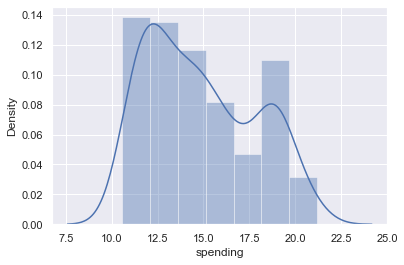

BoxPlot of spending
----------------------------------------------------------------------------


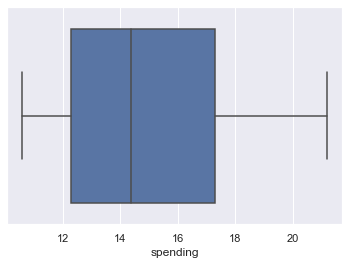

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


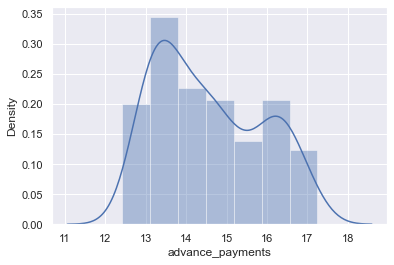

BoxPlot of advance_payments
----------------------------------------------------------------------------


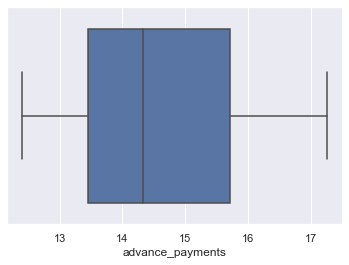

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


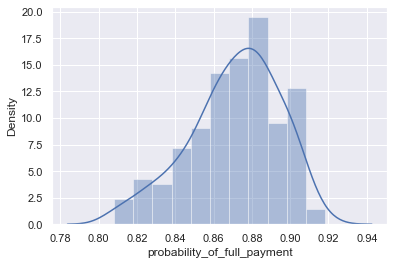

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


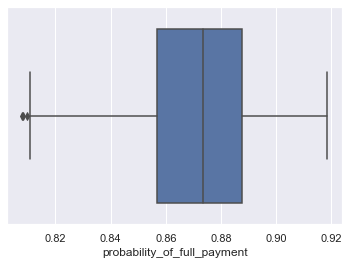

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


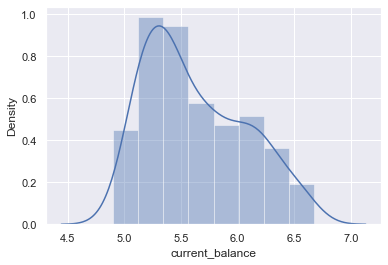

BoxPlot of current_balance
----------------------------------------------------------------------------


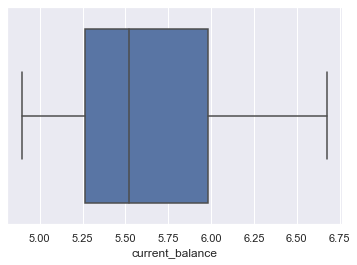

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


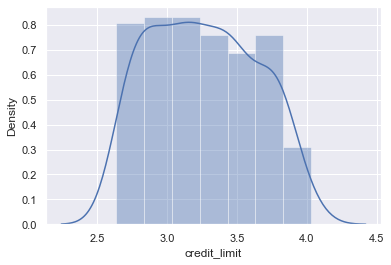

BoxPlot of credit_limit
----------------------------------------------------------------------------


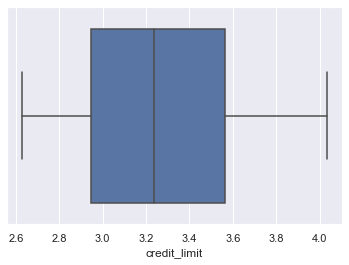

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


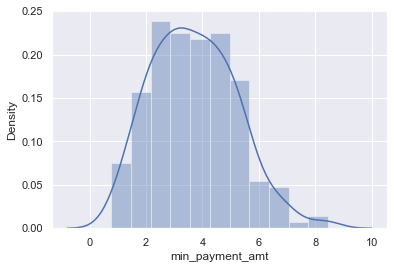

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


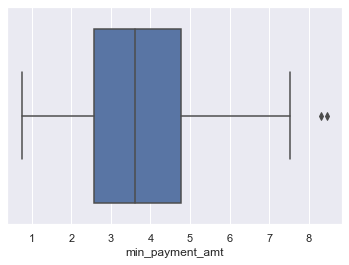

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


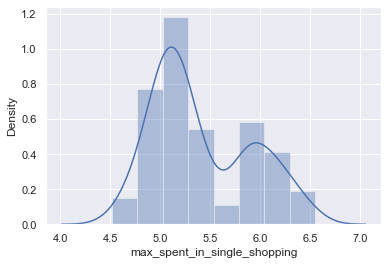

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


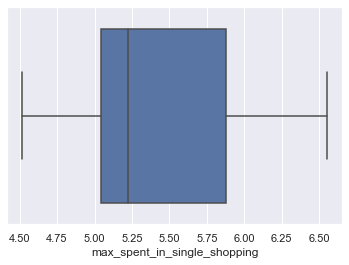

In [14]:
sns.color_palette("vlag", as_cmap=True)
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations

### 1 - spending
- From the above graphs, we can infer that mean spending of users is around 14.84K with the minimum of 10.59K and maximum of 21.18K
- The distribution of 'spending' is slightly right skewed with skewness vlaue of 0.399
- The dist plot shows the distribution of data from 10 to 22 (1000's)
- The box plot of the spending variable shows no outliers.

### 2 - advance_payments
- From the above graphs, we can infer that mean of advance payments by users is around 1.455K with the minimum of 1.241K and maximum of 1.725K
- The distribution of 'advance_payments' is slightly right skewed with skewness vlaue of 0.386
- The dist plot shows the distribution of data from 12 to 17 (100's)
- The box plot of the advance payments variable shows no outliers.

### 3 - probability_of_full_payment
- From the above graphs, we can infer that mean probability of full payment by users is 0.87 with the minimum of 0.80 and maximum of 0.91
- The distribution of 'probability_of_full_payment' is left skewed with skewness vlaue of -0.537
- The dist plot shows the distribution of data from 0.80 to 0.92
- The box plot of the probability of full payment variable shows few outliers.
- The Probability values is good above 80%

### 4 - current_balance
- From the above graphs, we can infer that mean current balance of users is 5.628K with the minimum of 4.899K and maximum of 6.675K
- The distribution of 'current_balance' is right skewed with skewness vlaue of 0.525
- The dist plot shows the distribution of data from 5.0 to 6.5 (1000's)
- The box plot of the current balance variable shows no outliers.

### 5 - credit_limit
- From the above graphs, we can infer that mean credit limit of users is 32.58K with the minimum of 26.3K and maximum of 40.33K
- The distribution of 'current_balance' is slightly right skewed with skewness vlaue of 0.1343
- The dist plot shows the distribution of data from 2.5 to 4.0 (10,000's)
- The box plot of the credit limit variable shows no outliers.

### 6 - min_payment_amt
- From the above graphs, we can infer that mean of minimum payment amount by the customer while making payments for purchases made monthly is 0.37K with the minimum of 0.0765K and maximum of 0.845K
- The distribution of 'min_payment_amt' is right skewed with skewness vlaue of 0.4016
- The dist plot shows the distribution of data from 2 to 8 (100's)
- The box plot of the min payment amount variable shows few outliers.

### 6 - max_spent_in_single_shopping
- From the above graphs, we can infer that mean of max spent in single shopping is 5.408K with the minimum of 4.519K and maximum of  6.550K
- The distribution of 'max_spent_in_single_shoppingt' is right skewed with skewness vlaue of 0.5618
- The dist plot shows the distribution of data from 4.5 to 6.5(1000's)
- The box plot of the max spent in single shopping variable shows no outliers.


### Bivariate Analysis

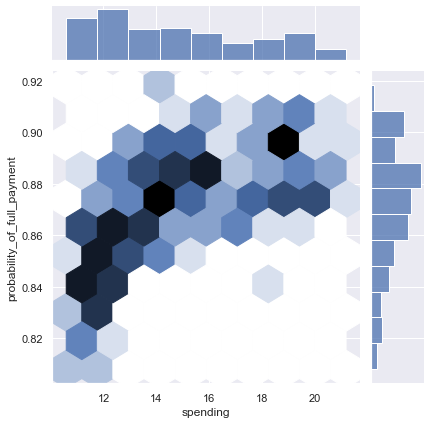

In [4]:
sns.jointplot(df_clust['spending'], df_clust['probability_of_full_payment'], kind="hex");

- From above graph we can infer that, users who spend less in the range of 10K-12K, have high probability of full payment.
- The spending and probability of full payaemnt are inversely propostional to each other, lesser the spending higher the probability of full payment and higher the spending the probability of full payment is very less.

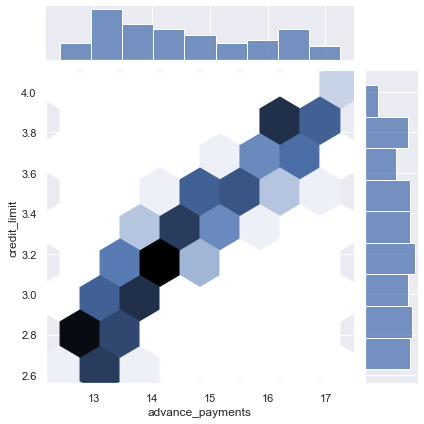

In [7]:
sns.jointplot(df_clust['advance_payments'], df_clust['credit_limit'], kind="hex");

- From the above graph we can infer that, the adavance payments and credit limit are linearly proportional.

#### Pairplot

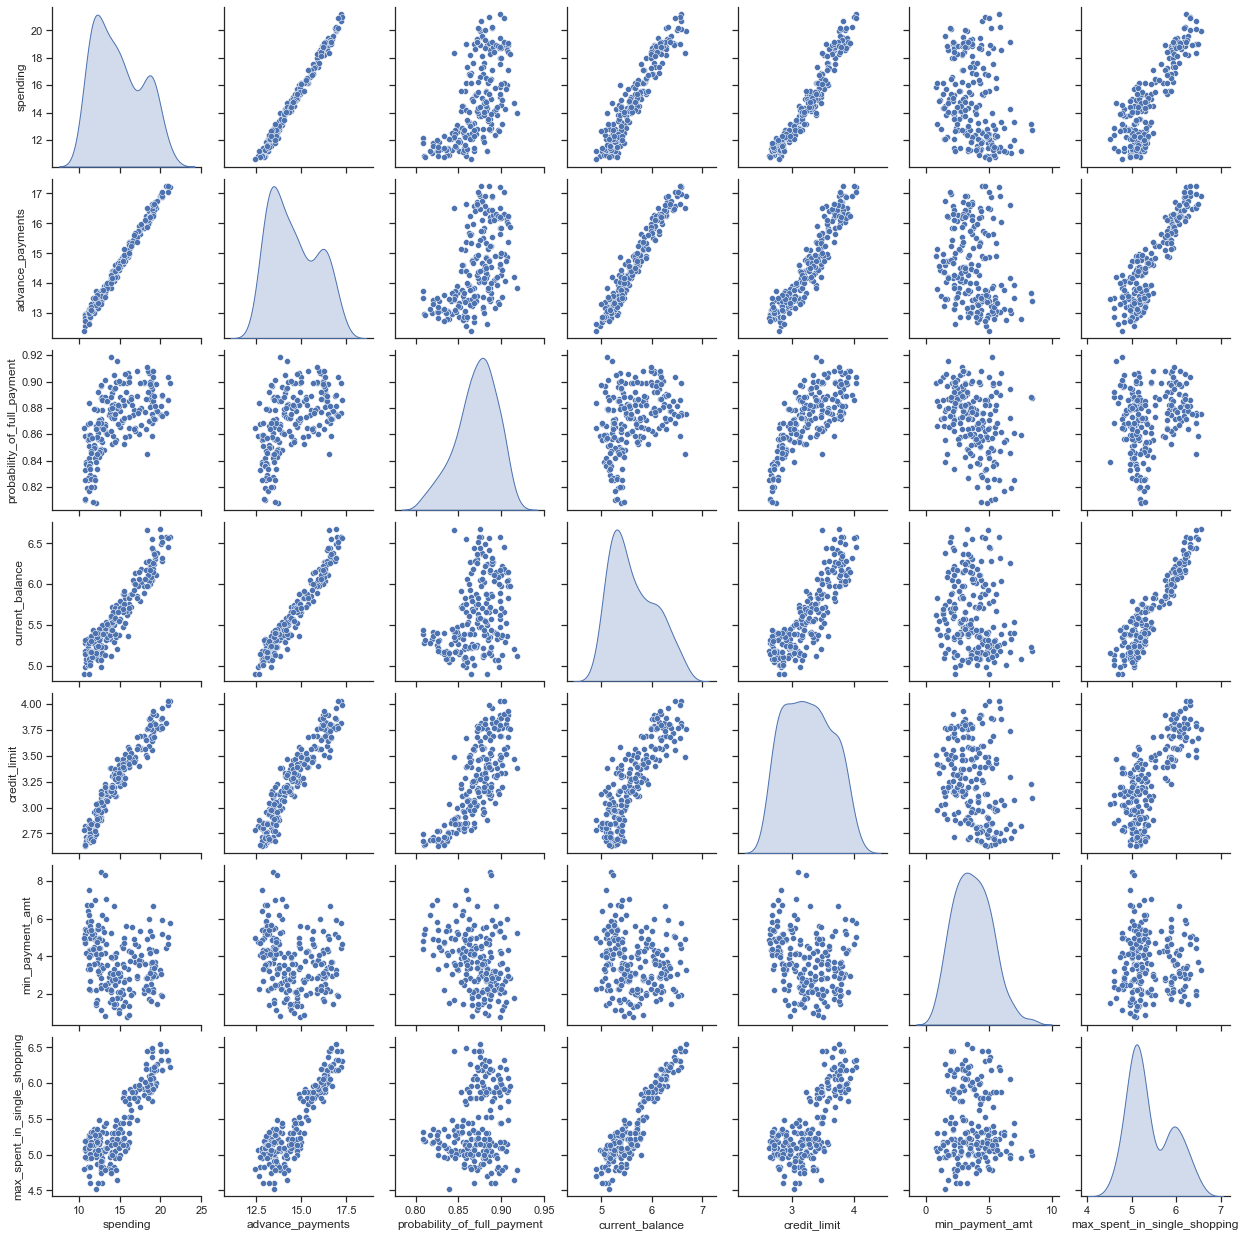

In [15]:
sns.color_palette("vlag", as_cmap=True)
sns.set_theme(style="ticks")
sns.pairplot(df_clust,diag_kind='kde');

### Multivariate Analysis

#### Heatmap

A heatmap gives us the correlation between numerical variables. If the correlation value is tending to 1, the variables are highly positively correlated whereas if the correlation value is close to 0, the variables are not correlated. Also, if the value is negative, the correlation is negative. That means, higher the value of one variable, the lower is the value of another variable and vice-versa. 

In [16]:
corr = df_clust.corr()

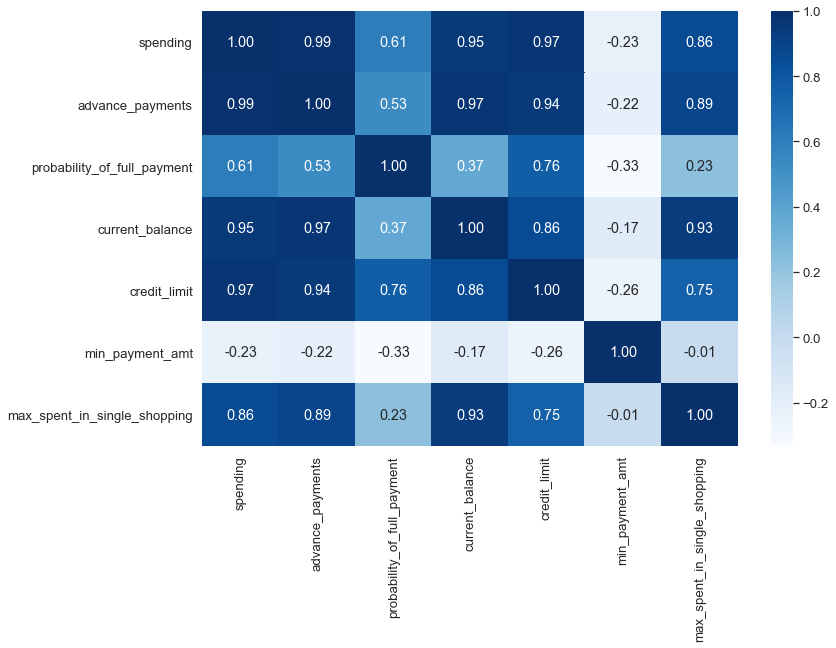

In [17]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues',annot=True,fmt='.2f');
plt.show()

In [18]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df_clust.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack()  
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
advance_payments             spending                         0.994341
                             current_balance                  0.972422
credit_limit                 spending                         0.970771
current_balance              spending                         0.949985
advance_payments             credit_limit                     0.944829
max_spent_in_single_shopping current_balance                  0.932806
advance_payments             max_spent_in_single_shopping     0.890784
spending                     max_spent_in_single_shopping     0.863693
current_balance              credit_limit                     0.860415
probability_of_full_payment  credit_limit                     0.761635
max_spent_in_single_shopping credit_limit                     0.749131
spending                     probability_of_full_payment      0.608288
advance_payments             probability_of_full_payment      0.529244
probability_of_full_payment  current_balance                  0.367915
                             min_payment_amt                  0.331471

### Observation
As per the Heat Map, we can conclude that the following variables are highly correlated:
-  Spending and advance_payments, spending and current_balance, spending and credit_limit
- Advance_payment and current_balance, advance_payment and credit limit
- Current balance and max spent in single shopping

#### Inferences
- By this we can conclude that the customers who are spending very high have a higher current balance and high credit limit. --- Advance payments and maximum expenditure done in single shopping are done by majority of those customers who have high current balance in their bank accounts.
- Probability of full payments are higher for those customers who have a higher credit limit. 
- Minimum payment amount is not correlated to any of the variables, hence, it is not affected by any changes in the current balance or credit limit of the customers.


### Outlier Treatment 
Outliers present should be treated as Clustering results are affected by the presence of outliers.

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q2,Q3=col.quantile([0.25,0.50,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [20]:
lrincome,urincome=remove_outlier(df_clust['probability_of_full_payment'])
df_clust['probability_of_full_payment']=np.where(df_clust['probability_of_full_payment']>urincome,urincome,
                                                 df_clust['probability_of_full_payment'])
df_clust['probability_of_full_payment']=np.where(df_clust['probability_of_full_payment']<lrincome,lrincome,
                                                 df_clust['probability_of_full_payment'])

In [21]:
lrincome,urincome=remove_outlier(df_clust['min_payment_amt'])
df_clust['min_payment_amt']=np.where(df_clust['min_payment_amt']>urincome,urincome,df_clust['min_payment_amt'])
df_clust['min_payment_amt']=np.where(df_clust['min_payment_amt']<lrincome,lrincome,df_clust['min_payment_amt'])

##### check presence of outliers

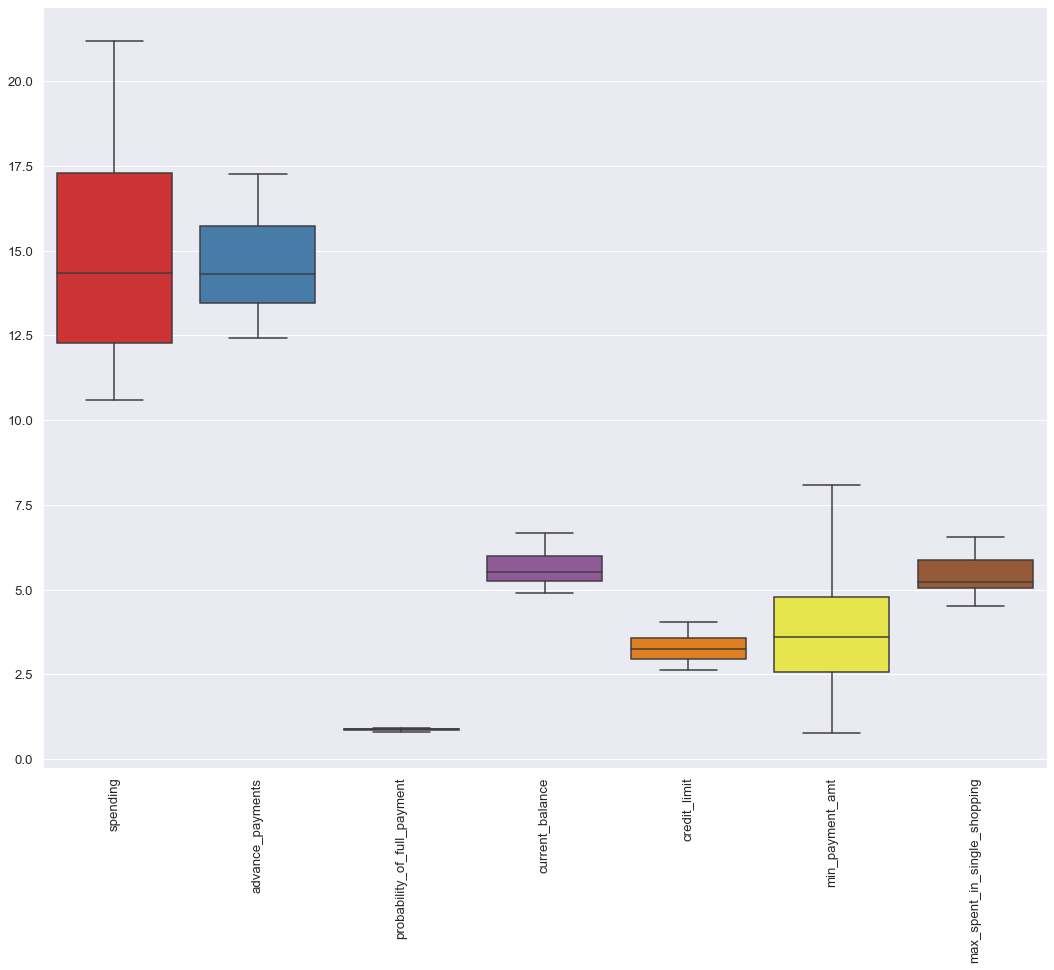

In [22]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
sns.set_palette("Set1")
box = sns.boxplot(data=df_clust)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is necessary for clustering in this case.

The clustering model works on the distance based calculations. Mostly Euclidean distance. If the data is unscaled, the distances calculated for each variable would be on different scales. Hence, the computation won't be making much sense.

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization.If feature scaling is not done, then a machine learning algorithm tends to weigh greater values as higher weightage and consider smaller values as the lower weightage, regardless of the unit of the values.

For the data given, scaling is required as all the variables are expressed in different units such as spending in 1000’s, advance payments in 100’s and credit limit in 10000’s, whereas probability is expressed as fraction or decimal values.

Since the other values expressed in higher units will outweigh probabilities and can give varied results hence it is important to Scale the data using Standard Scaler and therefore normalise the values where the means will be 0 and standard deviation 1.

Scaling of data is done using importing a package called StandardScaler from sklearn.preprocessing.For further clustering of dataset, we will be using the scaled data


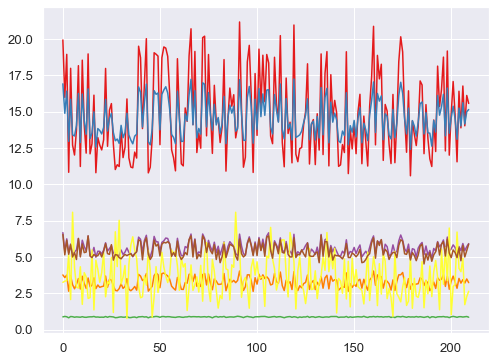

In [23]:
# prior to scaling 
plt.figure(figsize=(8,6))
plt.plot(df_clust)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = pd.DataFrame(X.fit_transform(df_clust), columns=df_clust.columns)

In [25]:
scaled_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
5,-0.739821,-0.882135,0.696692,-1.007977,-0.444794,2.938945,-0.832274
6,-0.974080,-0.943539,-0.881773,-0.630155,-1.190520,0.384751,-0.204099
7,-0.381541,-0.390903,0.143591,-0.331518,-0.383756,-0.513228,-1.189192
8,1.144591,1.305384,-0.311654,1.453520,0.672468,-0.566208,1.764048
9,-1.246235,-1.288937,-0.847736,-1.105261,-1.230328,0.420965,-0.826156


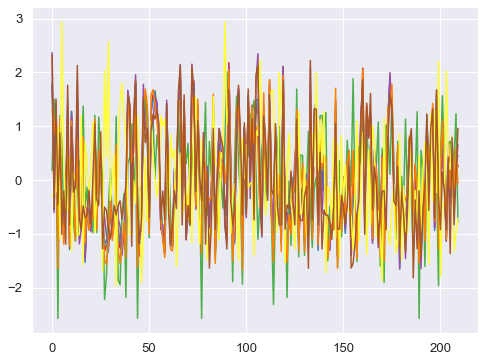

In [26]:
#after scaling
plt.figure(figsize=(8,6))
plt.plot(scaled_df)
plt.show()

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

Hierarchical clustering is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. There are two types of hierarchical clustering, Divisive and Agglomerative.

For the dataset in question we will be using Agglomerative Hierarchical Clustering method to create optimum clusters and categorising the dataset on the basis of these clusters.

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
wardlink = linkage(scaled_df, method = 'ward')

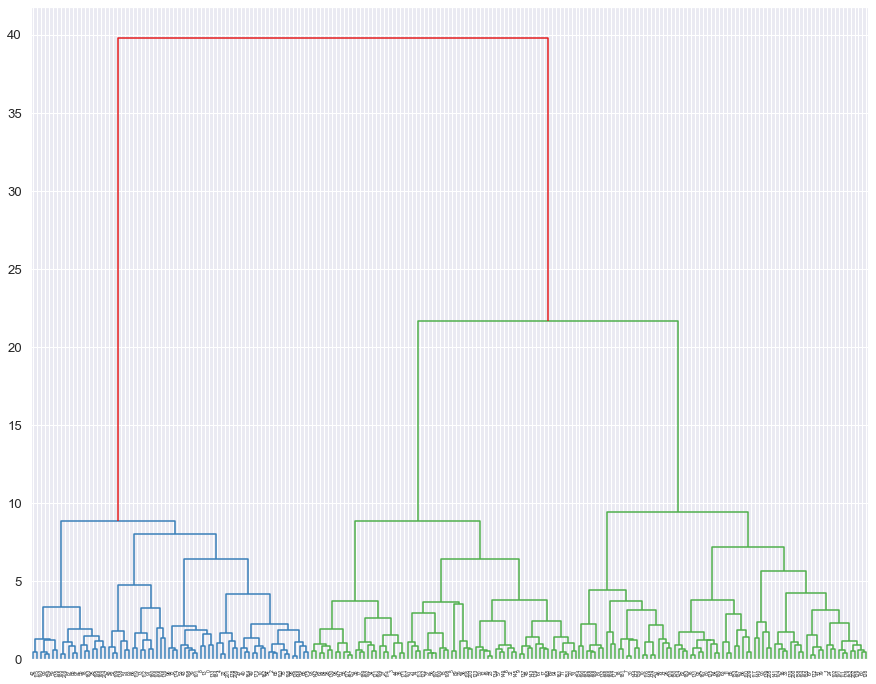

In [29]:
plt.figure(figsize=(15,12))
sns.set_palette("Set1")
dend = dendrogram(wardlink)

- Dendrogram is created using the scaled data, and using the 'Ward' linkage method.
- Firstly, imported the package dendrogram, linkage from scipy.cluster.hierarchy. Using this function, we have created a dendrogram.
- The above Dendrogram, the colour combination shows 2 clusters.
- Two clusters really do not make much business impact as it is kind of implicit. For example, for the dataset, it is imperative that there will be some high spenders and some low spenders.
- Further, the Dendrogram is truncated to the last 10 linkage to find the optimal number cluster through which we can solve our business objective.


##### Plot the truncated dendrogram

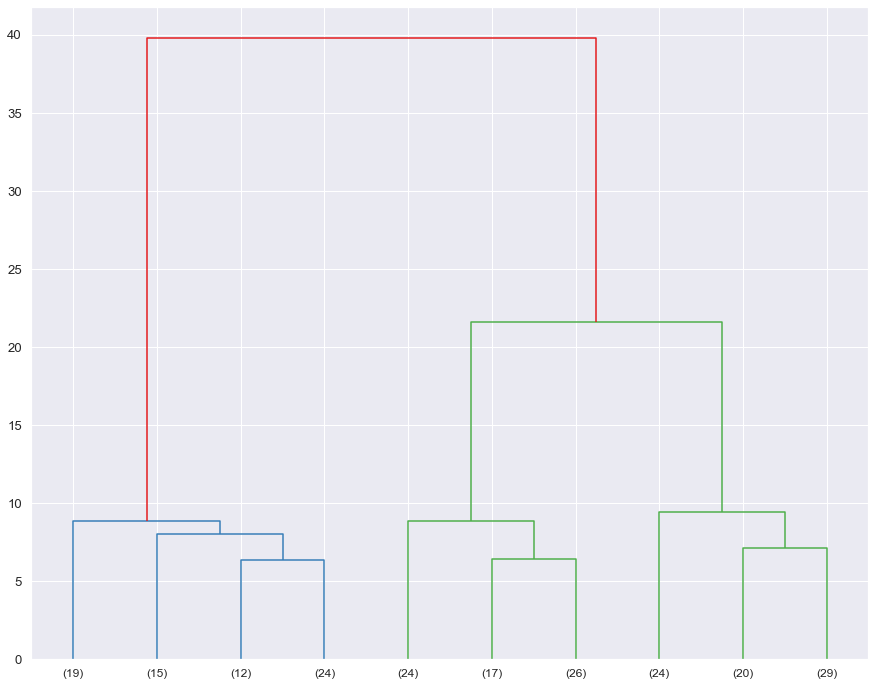

In [30]:
plt.figure(figsize=(15,12))
dend = dendrogram(wardlink, truncate_mode='lastp', p=10)

- Now, we can understand all the data points have clustered into 3 clusters which is the optimal number id clusters for buisness problem
- Next mapping these clusters to the dataset, We use fcluster() to find the optimal number of clusters. With Wardlink method, and criterion as 'maxclust' with value as 3 we find the optimal number of clusters.
- Also when you look at the dendrogram, it seems that 2 clusters would be optimal. But that is not the only way to interpret. With distance criterion and value as 20-25, we see that that the optimal number of clusters shall be 3. 

In [31]:
from scipy.cluster.hierarchy import fcluster

In [32]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [33]:
df_clust['clusters'] = clusters

In [34]:
df_clust.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,2
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,3
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2


###  Cluster Frequency

Now that we have identified the optimum number of clusters (3) using the above mentioned method, we can now group the clusters using groupby() function and identify the frequency of the occurrence of each clusters.

In [35]:
count = df_clust['clusters'].value_counts().sort_index()
count

1    70
2    67
3    73
Name: clusters, dtype: int64

###  Cluster Profiling

In [36]:
aggdata=df_clust.groupby('clusters').mean()
aggdata['Freq']=df_clust.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


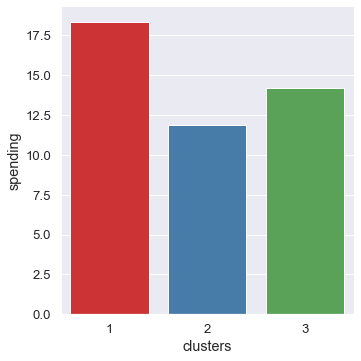

In [37]:
sns.catplot(x='clusters',y='spending',data=df_clust, kind='bar', ci=None);

### Observations
Cluster grouping based on the dendrogram, 3 looks good, based on current dataset given, 3 cluster solution makes sense based on the spending pattern 
- cluster 1 - High spending
- cluster 2 - Low spending
- cluster 3 - Medium spending

And three group cluster solution gives a pattern based on high/medium/low spending with max_spent_in_single_shopping (high value item) and probability_of_full_payment (payment made).


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

#### K-means clustering,
- Randomly we decide to give n_clusters = 3 and look at the distribution of clusters according to the n_clusters.
- Applying K-means technique to the scaled data.


In [38]:
from sklearn.cluster import KMeans

In [39]:
k_means = KMeans(n_clusters = 1, random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

1469.999999999999

In [40]:
k_means = KMeans(n_clusters = 2, random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

659.14740095485

In [41]:
k_means = KMeans(n_clusters = 3, random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

430.298481751223

In [42]:
k_means = KMeans(n_clusters = 4, random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

370.86859623942047

##### Calculating within sum of squares variance for the clusters ranging from 1 to 11: Elbow Method

In [43]:
wss = []

In [44]:
for i in range(1,11):
    KM = KMeans(n_clusters = i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [45]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.86859623942047,
 328.20399270811714,
 289.7476634411696,
 262.59831712590284,
 241.4383087594363,
 221.00431051620964,
 205.8191561657478]

### Plotting the Elbow Curve

In [46]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

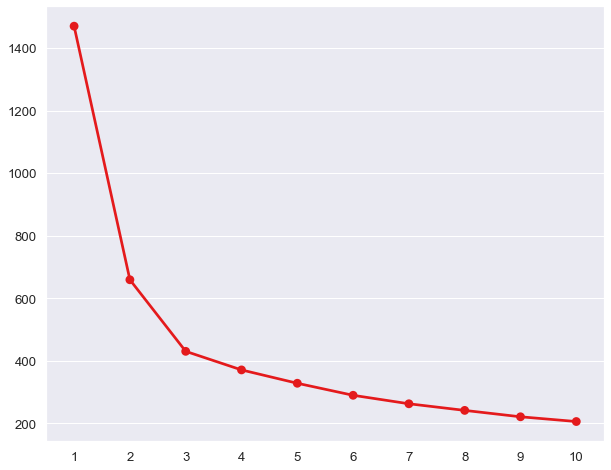

In [47]:
plt.figure(figsize=(10,8))
sns.pointplot(a, wss)

Drop from 2 to 3 is significant, after that no significant drop, therefore, 3 might be the optimum value for k (clusters #)

In [48]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.298481751223

In [49]:
clust_k = df_clust.drop('clusters', axis=1)
clust_k['kmeans_clusters'] = k_means.labels_ 
clust_k.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,0
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,0
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,0


### silhouette score
The silhouette score is a measure of how close each point in one cluster is to points in the neighbouring clusters. From sklearn.metrics, we import silhouette_samples, silhouette_score function to do this.

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
silhouette_score(scaled_df, k_means.labels_ ,random_state=0)

0.4008059221522216

In [52]:
silhouette_samples(scaled_df, k_means.labels_)

array([0.5732776 , 0.36556355, 0.63709249, 0.515595  , 0.36097201,
       0.22152508, 0.47529542, 0.36025848, 0.51938329, 0.53443903,
       0.46599399, 0.12839864, 0.39177784, 0.52379458, 0.11202082,
       0.22512083, 0.33760956, 0.5018087 , 0.03635503, 0.23801566,
       0.36177434, 0.3693663 , 0.43153403, 0.26364196, 0.47484293,
       0.06663956, 0.27151643, 0.50414367, 0.55487254, 0.43479958,
       0.37528473, 0.43006502, 0.39151526, 0.3943622 , 0.5362567 ,
       0.55717776, 0.50878421, 0.42617776, 0.50641159, 0.62170114,
       0.55929539, 0.48579454, 0.39864428, 0.61044051, 0.51398993,
       0.37791063, 0.30664315, 0.58154614, 0.48759463, 0.53302467,
       0.31693425, 0.49463828, 0.58531649, 0.59861082, 0.61892471,
       0.23370264, 0.44475373, 0.54060572, 0.57808265, 0.57623567,
       0.55297302, 0.51585343, 0.55579575, 0.27793624, 0.49524145,
       0.56405298, 0.57784591, 0.52274801, 0.6313322 , 0.08521853,
       0.44260057, 0.3237709 , 0.54096805, 0.5820664 , 0.29582

In [53]:
clust_k['silh_wid'] = silhouette_samples(scaled_df, k_means.labels_)

In [54]:
clust_k.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,kmeans_clusters,silh_wid
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,0,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1,0.360972
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,0,0.221525
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,0,0.475295
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,2,0.360258
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1,0.519383
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,0,0.534439


In [55]:
clust_k['silh_wid'].min()

0.0027685411286160638

In [56]:
clust_k['silh_wid'].max()

0.6386809253215441

In [57]:
clust_k['silh_wid'].mean()

0.4008059221522218

- The silhouette scores and silhouette widths are calculated using silhouette_samples and silhouette_score package from sklearn.metrics. The average silhouettes score is coming to be 0.400 and minimum silhouette score is 0.002.  
- The silhouette score ranges from -1 to +1 and higher the silhouette score better the clustering.
- The min silwidth is computed which is 0.0027. All positive silwidth means that all details are matched to the correct clusters.

### Cluster Profilig

In [58]:
aggdata=clust_k.groupby('kmeans_clusters').mean()
aggdata['Freq']=clust_k.kmeans_clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,silh_wid,Freq
kmeans_clusters,,,,,,,,,
0,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,0.399556,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,0.468077,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,0.338593,71


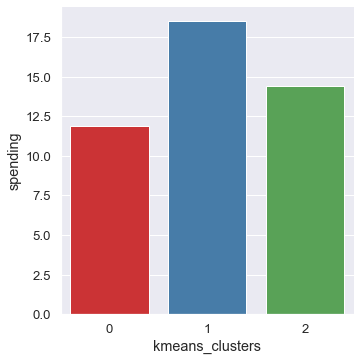

In [59]:
sns.catplot(x='kmeans_clusters',y='spending',data=clust_k, kind='bar', ci=None);

####  Cluster 0 - Low spending
####  Cluster 1 - High spending
####  Cluster 2 - Medium spending

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

### 1- Visualizing the Clusters of Hierarchical clustering

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='spending'>

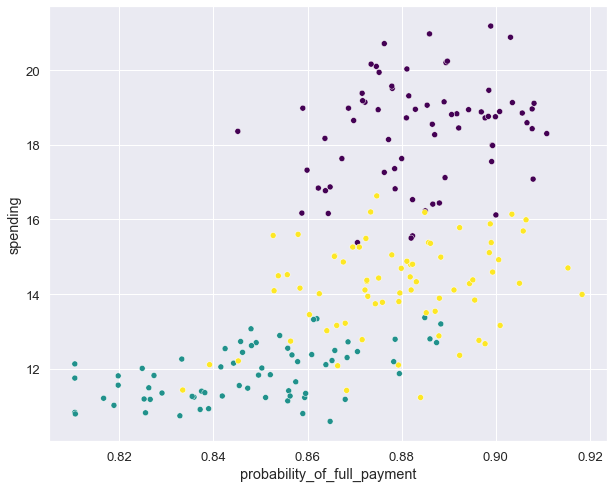

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(y = df_clust['spending'], x = df_clust['probability_of_full_payment'], c = clusters, cmap='viridis')

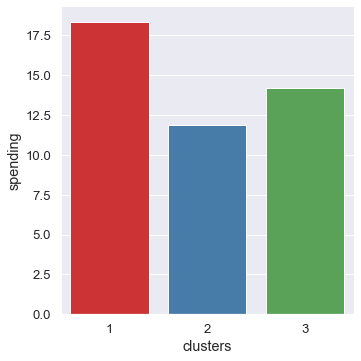

In [61]:
sns.catplot(x='clusters',y='spending',data=df_clust, kind='bar', ci=None);

### Cluster profiling for Hierarchical Clustering

In [62]:
aggdata=df_clust.groupby('clusters').mean()
aggdata['Freq']=df_clust.clusters.value_counts().sort_index()
aggdata.T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


### 2- Visualizing the Clusters of K-means clustering

<AxesSubplot:xlabel='probability_of_full_payment', ylabel='spending'>

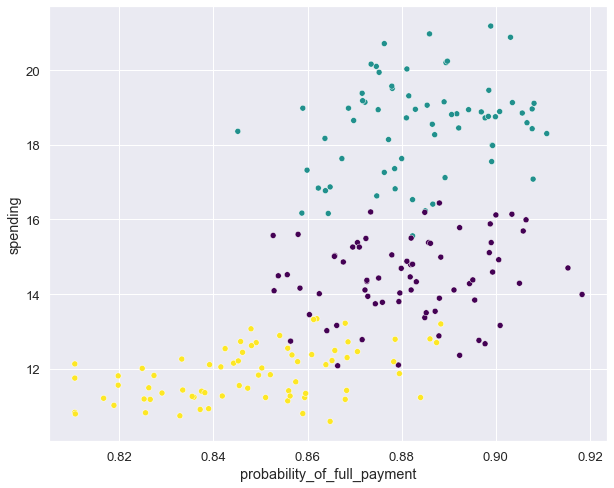

In [63]:
plt.figure(figsize=(10,8))
sns.scatterplot(y = clust_k['spending'], x = clust_k['probability_of_full_payment'], c = clust_k.kmeans_clusters,
               cmap='viridis_r')

We can see that in both the graphs the 3 different clusters are represented with different colours

### Cluster Profiling of K-means clustering

In [64]:
aggdata=clust_k.groupby('kmeans_clusters').mean()
aggdata['Freq']=clust_k.kmeans_clusters.value_counts().sort_index()
aggdata.T

kmeans_clusters,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848330,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.733892,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803
silh_wid,0.399556,0.468077,0.338593
Freq,72.000000,67.000000,71.000000


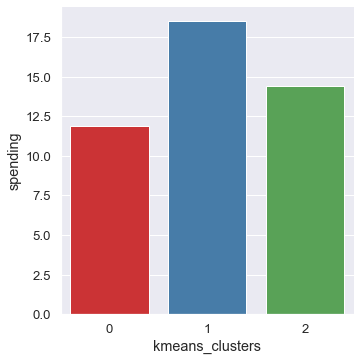

In [65]:
sns.catplot(x='kmeans_clusters',y='spending',data=clust_k, kind='bar', ci=None);

When we compare the frequencies both the methods, we can clear see that there is no much difference.Hence, will focus on the observations for K-means clusters:
####  Cluster 0 - Low spending -  72 frequency
####  Cluster 1 - High spending - 67 frequency
####  Cluster 2 - Medium spending - 71 frequency

### Cluster 0 - Low spending
- This segment has the lowest spending per month, lowest current balance and credit limit. This is the Financially Stressed Class with very low income on an average.
- This segment can be targeted with cards with offers such as zero annual charges and lurking them with benefits such as free coupons or tickets and waivers on a variety of places.
- To boost their payment rate, early payment offers/Rewards can be proposed.
- Minimum payment amount could be lowered and credit limit can be increased. This should be started with those customers whose payment rates are good and for others, offers should be given on early payments so that their payment rate becomes good.
- Increase their spending habits by forming partnerships with grocery stores, utilities, and other businesses (electricity, phone, gas, others)

### Cluster 1 - High Spending

- This segment has higher spending per month, high current balance and credit limit. This is the Prosperous or Upper class with majorly higher income.
- They have high expenditure value in single shopping, so can be offered discounts on their next big transaction. This will also increase the spending of this group.
- Giving any reward points might increase their purchases.
- This group's maximum max spent in single shopping is large, thus they may be offered a discount/offer on subsequent purchases if they pay in full.
- Tie up with luxary brands, which will drive more one_time_maximun spending.
- This segment can be targeted using various offers such as cards with rewards and loyalty points for every spent.

### Cluster 2 - Medium Spending

- This segment comprises of Customers making decent purchases, pay their bills on time, and have a solid credit score.
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate.
- For these customers, upselling needs to be done. Give them some lucrative discounts so that they use premium accounts to increase transcations
- This segment can be targeted with cards that have lower interest rates so as to encourage more spending.
- Increase spending habits by trying with premium ecommerce sites


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis)

### Read and view data

In [21]:
df = pd.read_csv("insurance_part2_data-2.csv")

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10.Age of insured (Age)

In [67]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


### Data Pre-processing

###### Checking for number of rows and columns:

In [68]:
df.shape

(3000, 10)

###### Checking for the information of features:

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


###### Checking for Null and missing values in the dataset :

In [70]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

###### Checking the Skewness and Kurtosis

In [71]:
df.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [72]:
df.kurt()

Age            1.652124
Commision     13.984825
Duration     427.587926
Sales          6.155248
dtype: float64

###### Checking the description of dataset

In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Geting unique counts of all Nominal Variables

In [74]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




###### Checking for duplicates in this dataset :

In [75]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


### Observations

- Dataset has 10 columns and 3000 rows
- The dataset  contains 10 variables where Age, Commision, Duration, Sales are numeric variable and rest are categorial variables.
- There are no null values in the dataset.
- There are 9 independant variable and one target/dependent variable - Clamied
- The minimum value of 'Duration' is negative value, which is possibly not right, Its a wrong entry.
- The median and means of Commision & Sales varies signficantly.
- Skewness and Kurtosis is also calculated for each column, Data with high skewness indicates lack of symmetry and high value of kurtosis indicates heavily tailed data.
- Based on summary descriptive, the data looks good at first glance.
- There are 139 duplicate records, but it can be of different customers, since there is no customer ID or any unique identifier,so not dropping them.

### Data Visualization :

### Univariate Analysis :

In [76]:
df_num = df.select_dtypes(['float64','int64'])
df_cat = df.select_dtypes(['object'])

###### Univariate analysis for Numeric variables

In [77]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde= True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    
    plt.show()

In [78]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Description of Age
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 Distribution of Age
----------------------------------------------------------------------------


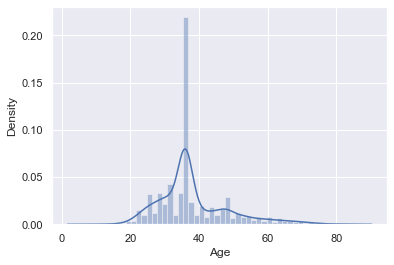

BoxPlot of Age
----------------------------------------------------------------------------


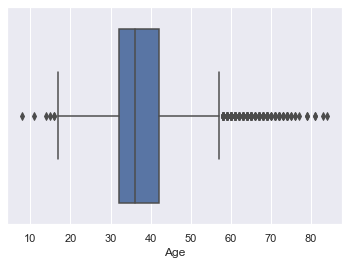

Description of Commision
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 Distribution of Commision
----------------------------------------------------------------------------


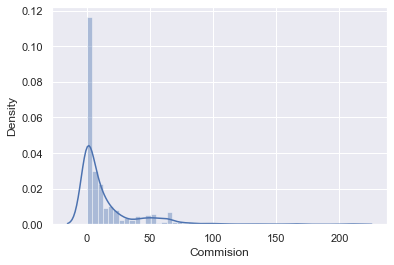

BoxPlot of Commision
----------------------------------------------------------------------------


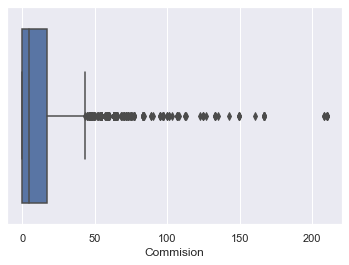

Description of Duration
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 Distribution of Duration
----------------------------------------------------------------------------


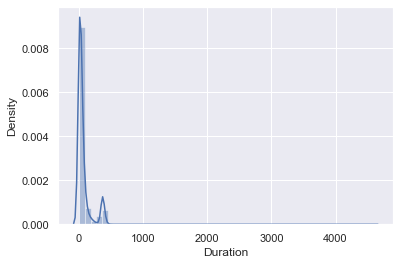

BoxPlot of Duration
----------------------------------------------------------------------------


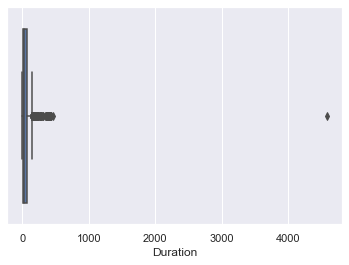

Description of Sales
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 Distribution of Sales
----------------------------------------------------------------------------


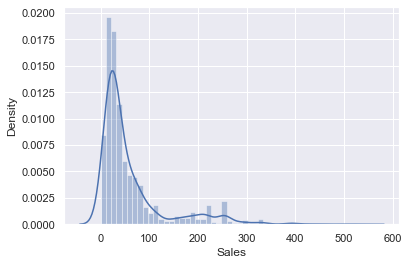

BoxPlot of Sales
----------------------------------------------------------------------------


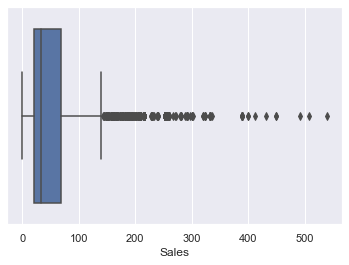

In [79]:
sns.color_palette("vlag", as_cmap=True)
sns.set_theme(style="ticks")
sns.set(color_codes=True)
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations

### 1 - Age
- From the above graphs, we can infer that mean Age of insured is around 38 with the minimum of 8 and maximum of 84.
- The distribution of 'Age' is right skewed with skewness vlaue of 1.149.
- The dist plot shows the distribution of data from 20 to 80.
- In the range of 30 to 40 is where the majority of the distribution lies.
- The box plot of the 'Age' variable shows outliers.

### 2 - Commision
- From the above graphs, we can infer that mean of commission received for tour insurance firm is around 14.52 with the maximum of 210
- The distribution of 'Commision' is right skewed with skewness vlaue of 3.148
- The dist plot shows the distribution of data from 0 to 30
- The box plot of the 'Commission' variable shows outliers

### 3 - Duration
- From the above graphs, we can infer that mean Duration of the tour is 70 days. 
- The distribution of 'Duration' is highly right skewed with skewness vlaue of 13.784
- The dist plot shows the distribution of data from 0 to 100
- The box plot of the duration variable shows outliers

### 4 - Sales
- From the above graphs, we can infer that mean sales per customer in procuring tour insurance policies in rupees is 6024.9rs with maximum of  53900rs.
- The distribution of 'Sales' is right skewed with skewness vlaue of 2.381
- The dist plot shows the distribution of data from 0 to 300 (100's)
- The box plot of the sales variable shows outliers.


###### Univariate analysis for Categorical variables

In [80]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [81]:
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

6

Details of Agency_Code
----------------------------------------------------------------
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


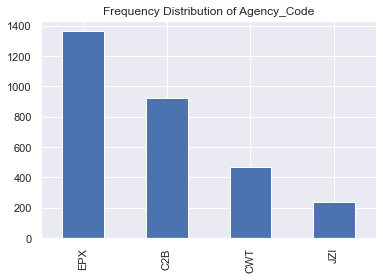

       
Details of Type
----------------------------------------------------------------
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


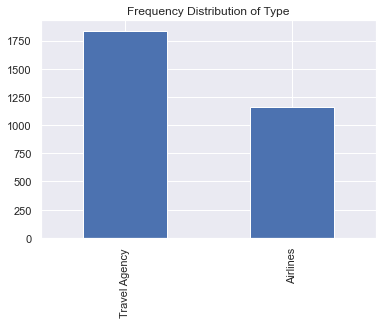

       
Details of Claimed
----------------------------------------------------------------
No     2076
Yes     924
Name: Claimed, dtype: int64


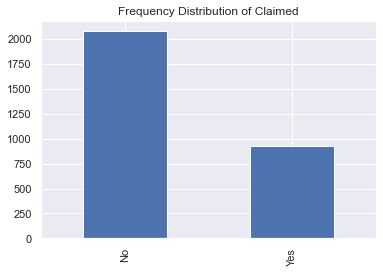

       
Details of Channel
----------------------------------------------------------------
Online     2954
Offline      46
Name: Channel, dtype: int64


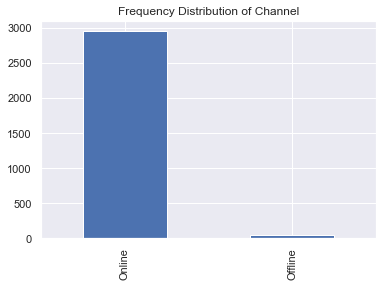

       
Details of Product Name
----------------------------------------------------------------
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


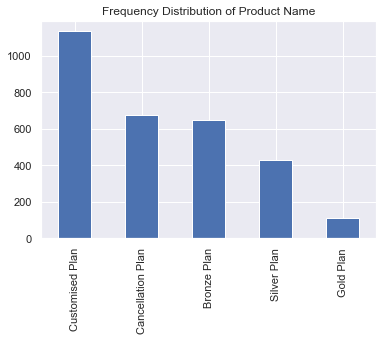

       
Details of Destination
----------------------------------------------------------------
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


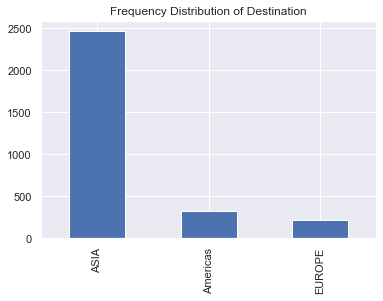

In [82]:
sns.color_palette("vlag", as_cmap=True)
sns.set_theme(style="ticks")
sns.set(color_codes=True)
for x in lstcatcolumns:
    univariateAnalysis_category(x)

### Observations

- The distribution of the agency code, shows us EPX with maximum frequency of 1365.
- The distribution of the Type of tour insurance firms, shows us Travel Agency with maximum claims of 1837.
- The distribution of the Claimed status, shows us 'No' as maximum frequency of 2076.
- The majority of customers have used online medium, very less with offline medium.
- Customized plan seems to be most liked plan by customers when compared to all other plans
- Asia is where customers choose when compared with other destination places

### Bivariate Analysis

In [83]:
sns.set_palette("Set1")
sns.set_theme(style="ticks")
sns.set(color_codes=True)

#### Agency_code vs Sales with hue as Claimed

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

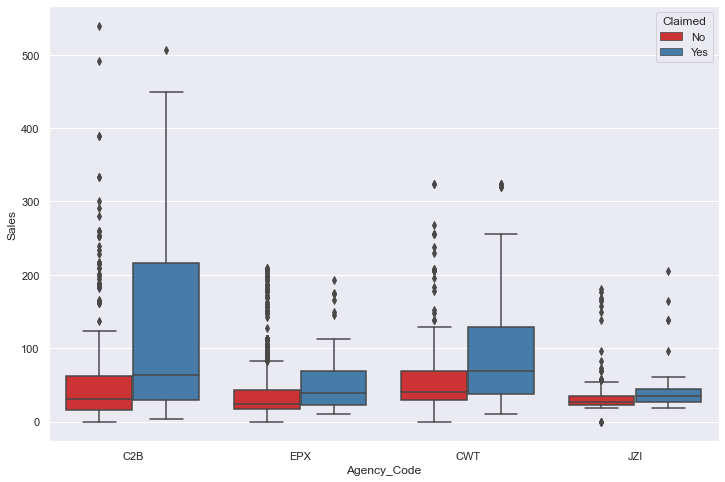

In [84]:
sns.set_palette("Set1")
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Agency_Code',y='Sales', hue='Claimed')

- The box plot shows the split of sales with different agency code and also hue having claimed column.
- It seems that C2B have claimed more claims than other agency

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

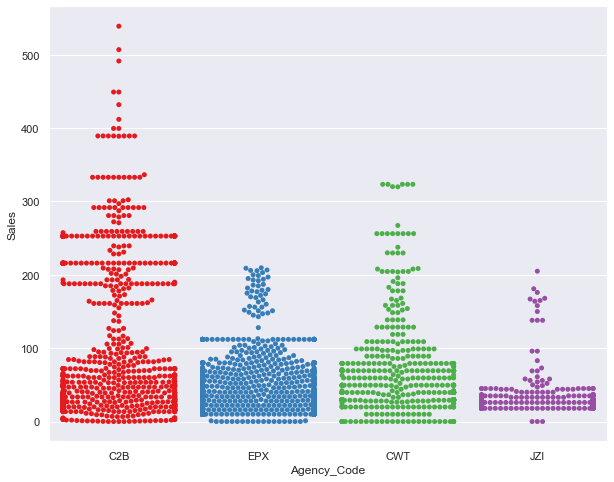

In [15]:
sns.set_palette("Set1")
plt.figure(figsize=(10,8))
sns.swarmplot(data = df, x='Agency_Code',y='Sales')

- From the above graph we can infer that, the C2B Agency sales are spread in wide range from 0-400, with few ouliers.
- The least sales is from the JZI agency.

#### Type vs Sales with hue as Claimed

<AxesSubplot:xlabel='Type', ylabel='Sales'>

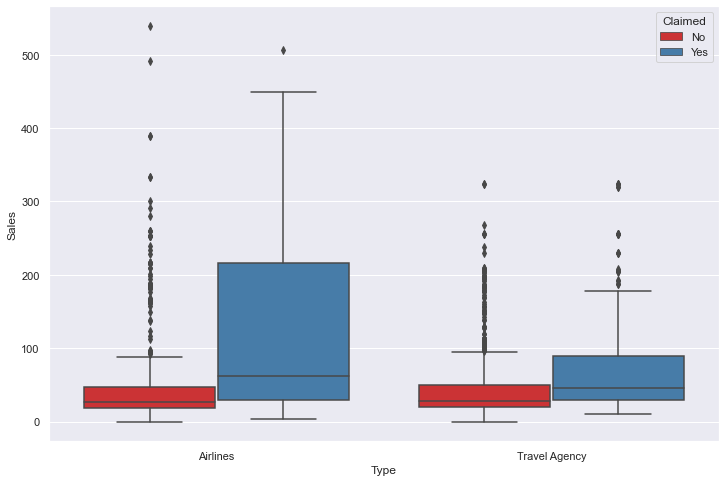

In [85]:
sns.set_palette("Set1")
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Type',y='Sales', hue='Claimed')

- The box plot shows the split of sales with different type and also hue having claimed column.
- We could understand airlines type has more claims.

<AxesSubplot:xlabel='Type', ylabel='Sales'>

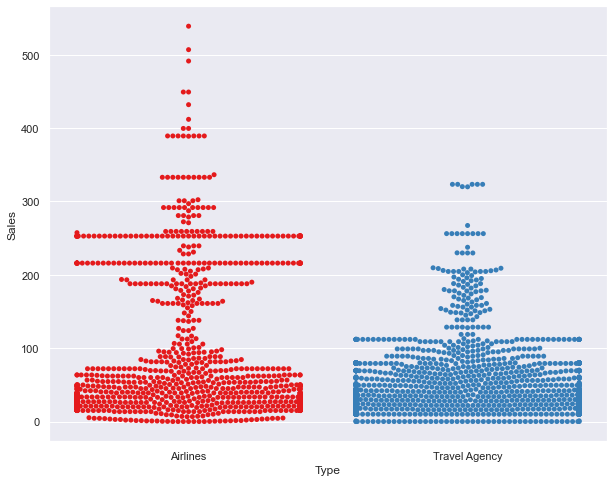

In [16]:
sns.set_palette("Set1")
plt.figure(figsize=(10,8))
sns.swarmplot(data = df, x='Type',y='Sales')

- Travel agency type has maximum number of claims though the amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s) ranges from 0-200 of most of data distribution, while the airlines sales is spread till the range of 300.

#### Channel vs Sales with hue as Claimed

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

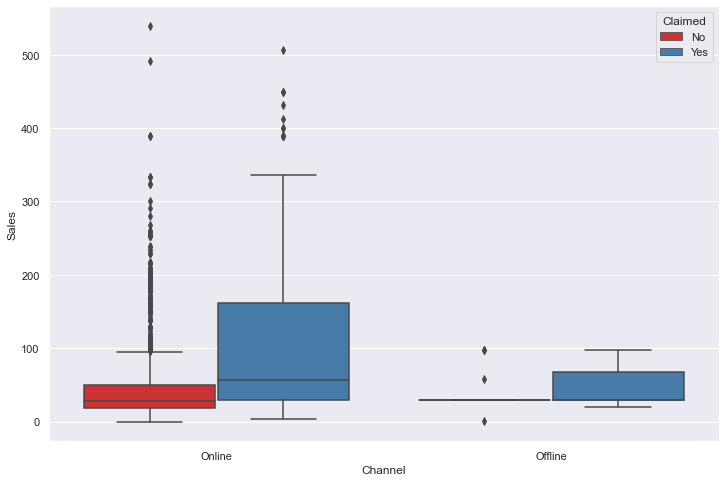

In [86]:
sns.set_palette("Set1")
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Channel',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

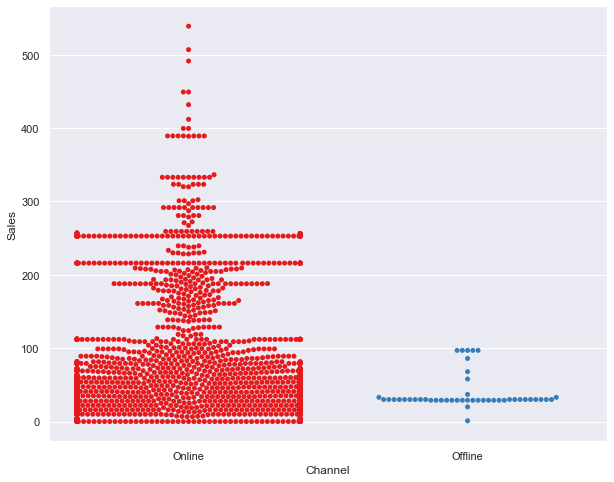

In [17]:
sns.set_palette("Set1")
plt.figure(figsize=(10,8))
sns.swarmplot(data = df, x='Channel',y='Sales')

- The box plot shows the split of sales with different channel and also hue having claimed column.
- we can see that, the majority of customers have used online medium and very less with offline medium.

#### Product Name vs Sales with hue as Claimed

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

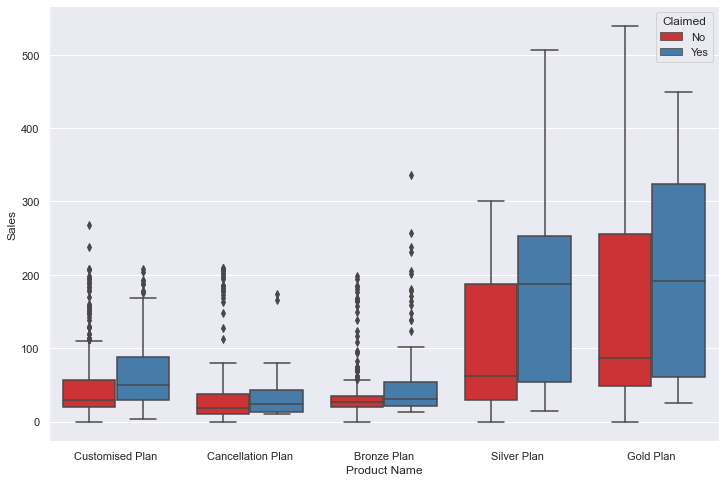

In [87]:
sns.set_palette("Set1")
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Product Name',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

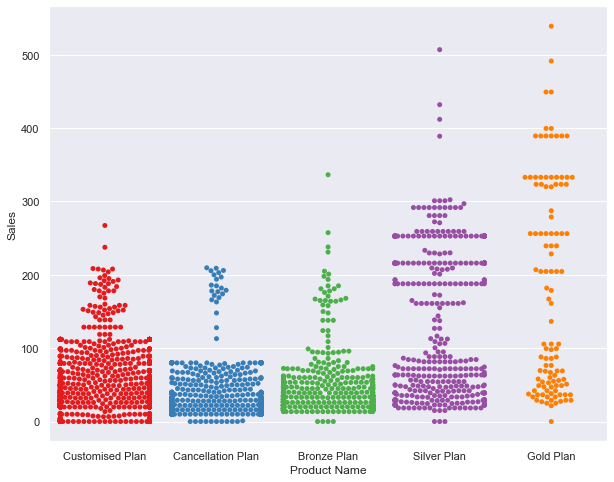

In [18]:
sns.set_palette("Set1")
plt.figure(figsize=(10,8))
sns.swarmplot(data = df, x='Product Name',y='Sales')

- The box plot shows the split of sales with different product name and also hue having claimed column.
- We can infer from above plots that, the number of sales in customised plan are more, but the amount worth of sales per customer in procuring tour insurance policies for gold plan is more.

#### Destination vs Sales with hue as Claimed

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

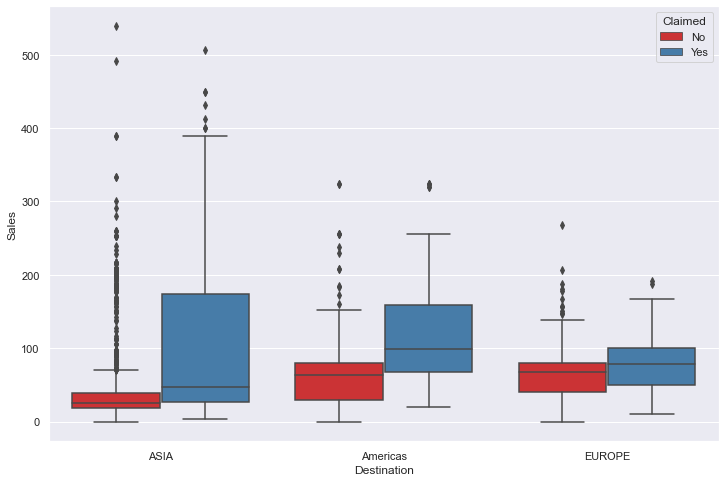

In [88]:
sns.set_palette("Set1")
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Destination',y='Sales', hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

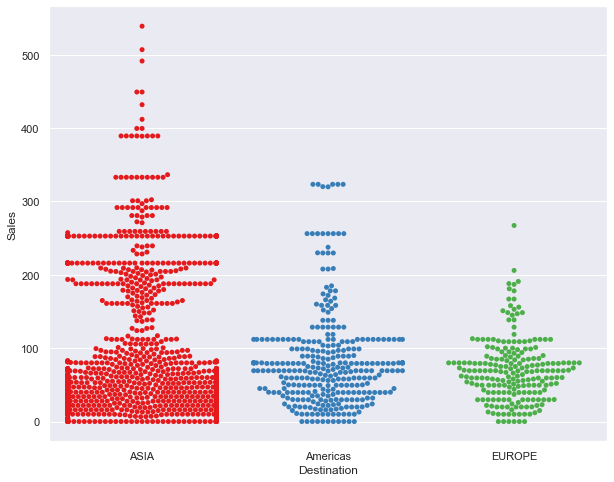

In [19]:
sns.set_palette("Set1")
plt.figure(figsize=(10,8))
sns.swarmplot(data = df, x='Destination',y='Sales')

- The box plot shows the split of sales with different destination and also hue having claimed column.
- Asia is where customers choose when compared with other destination places.
- Asia has the maximum amount worth of sales per customer for insurance.


#### Pairplot

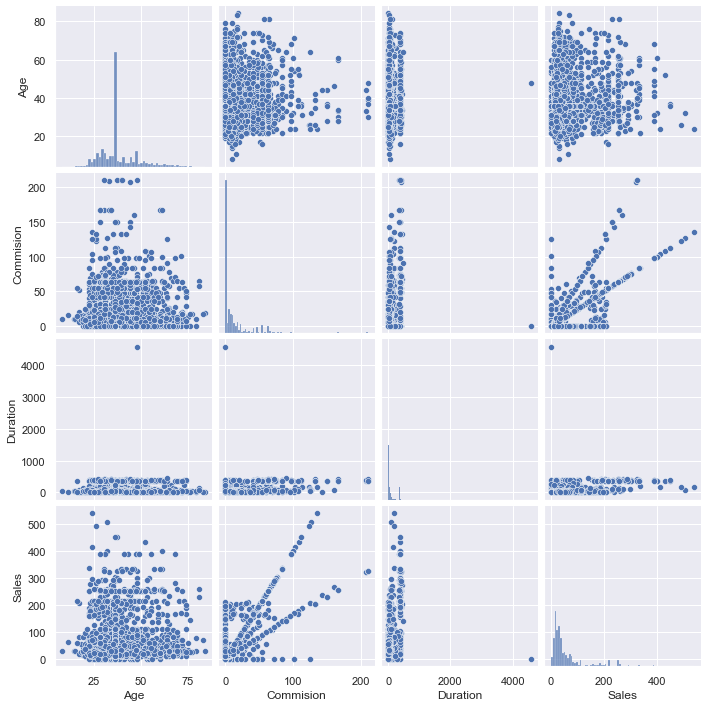

In [89]:
sns.color_palette("vlag", as_cmap=True)
sns.set_theme(style="ticks")
sns.set(color_codes=True)
sns.pairplot(df_num);

- A pair plot gives us correlation graphs between all numerical variables in the dataset. Thus, from the graphs we can identify the relationships between all numerical variables.
- We can see that the Sales and commission are directly proportional, as the amount of sales per customer for insurance increases the commission received for tour insurance firm also increase.

### Multivariate Analysis

#### Heatmap

A heatmap gives us the correlation between numerical variables. If the correlation value is tending to 1, the variables are highly positively correlated whereas if the correlation value is close to 0, the variables are not correlated. Also, if the value is negative, the correlation is negative. That means, higher the value of one variable, the lower is the value of another variable and vice-versa. 

In [90]:
corr=df.corr()

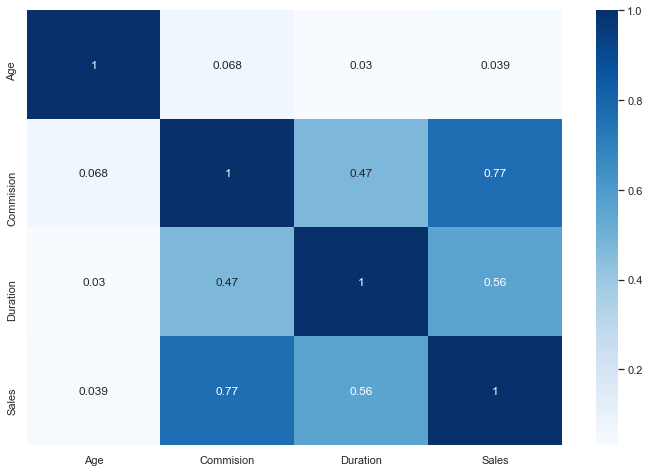

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap='Blues');
plt.show()

### Observations
- We can infer from above Heatmap that there is not much of multi collinearity.
- No negative correlation between the variables.
- we can see only positive correlation between between the variables.

### Feature engineering

In [92]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [94]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


#### Proportion of observations in Target variable

In [95]:
df['Claimed'].value_counts()

0    2076
1     924
Name: Claimed, dtype: int64

In [96]:
df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

#### Capture the target column into separate vectors for training set and test set

In [97]:
X = df.drop("Claimed" , axis=1) 

y = df.pop("Claimed") 

In [98]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)

#### Splitting data into training and test set

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=1)

In [100]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


In [101]:
train_labels.value_counts()

0    1471
1     629
Name: Claimed, dtype: int64

In [102]:
test_labels.value_counts()

0    605
1    295
Name: Claimed, dtype: int64

## Model 1 - CART

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [105]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

#### Predicting Train and Test data 

In [106]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

#### Variable Importance

In [107]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.254047
Sales         0.218322
Agency_Code   0.192517
Age           0.192073
Commision     0.071721
Product Name  0.038482
Destination   0.021657
Channel       0.008852
Type          0.002329


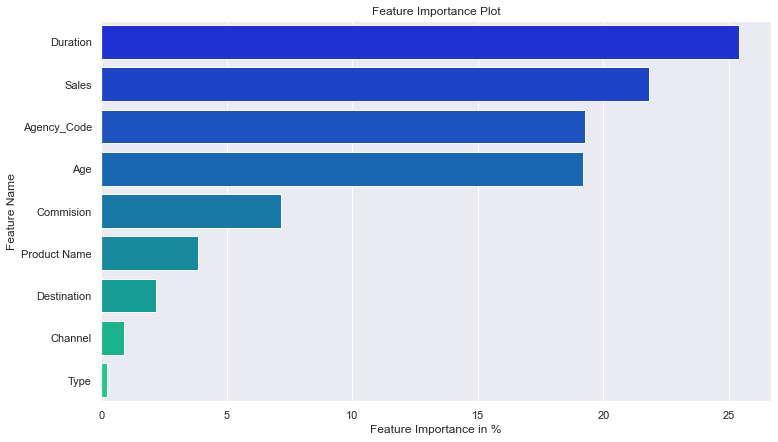

In [108]:
### Fearture importance graph
x=pd.DataFrame(dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='winter')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Model Performance of Train data

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

#### Classification Report

In [110]:
print(classification_report(train_labels, dt_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.98      0.99       629

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



#### Train Accuracy

In [111]:
dt_model.score(X_train, train_labels)

0.9947619047619047

#### Confusion Matrix

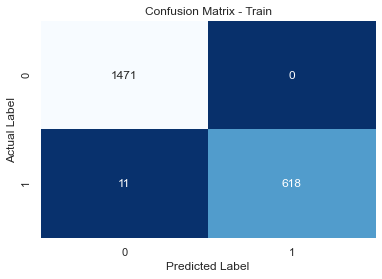

In [112]:
sns.heatmap(confusion_matrix(train_labels,dt_model.predict(X_train)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train')
plt.show()

#### AUC and ROC Curve for training data

AUC: 1.000


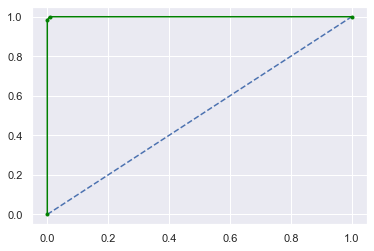

In [113]:
# AUC and ROC for the training data (Development Sample)
import matplotlib.colors as mcolors

# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

#### Classification Report

In [114]:
print(classification_report(test_labels, dt_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       605
           1       0.57      0.49      0.53       295

    accuracy                           0.71       900
   macro avg       0.67      0.66      0.66       900
weighted avg       0.70      0.71      0.71       900



#### Test Accuracy

In [115]:
dt_model.score(X_test, test_labels)

0.7133333333333334

#### Confusion Matrix

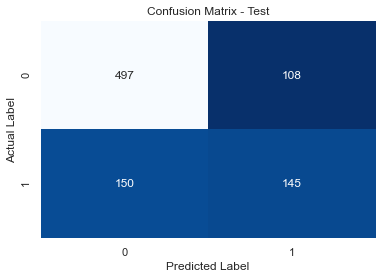

In [116]:
sns.heatmap(confusion_matrix(test_labels,dt_model.predict(X_test)),annot=True, fmt='d', cbar=False,cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test')
plt.show()

#### AUC and ROC Curve for testing data

AUC: 0.656


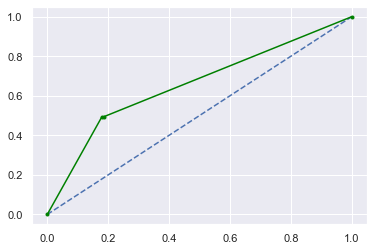

In [117]:
# AUC and ROC for the test data (Holdout sample)

# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Regularising the Decision Tree, Adding Tuning Parameters

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6,7],
    'min_samples_leaf': [20,30,50], # 1-3% of total data
    'min_samples_split': [60,90,150,200] # 3 times of min sample leaf
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [119]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [20, 30, 50],
                         'min_samples_split': [60, 90, 150, 200]})

In [120]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 150}

In [121]:
best_grid_dt = grid_search.best_estimator_

#### Feature Importance

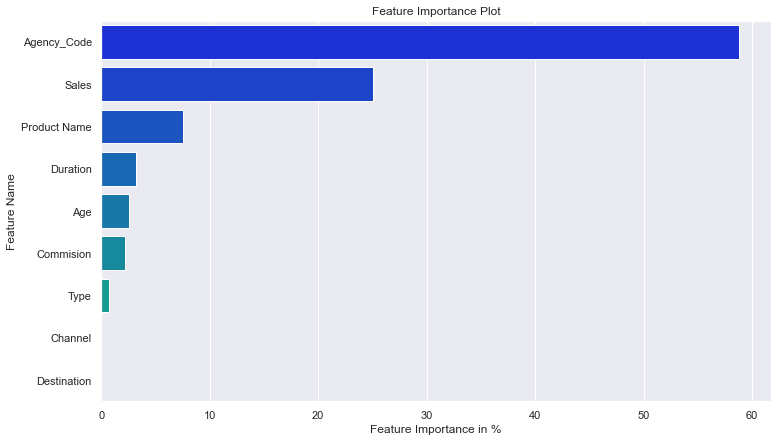

In [122]:
x=pd.DataFrame(best_grid_dt.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='winter')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Model Performance of Train data

#### Classification Report 

In [123]:
print(classification_report(train_labels,best_grid_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.69      0.58      0.63       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



#### Confusion Matrix

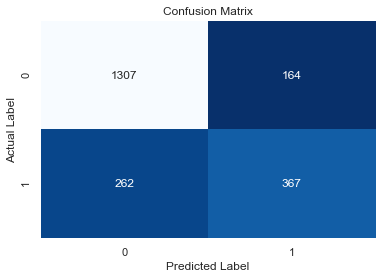

In [124]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,best_grid_dt.predict(X_train))
sns.heatmap(confusion_matrix(train_labels,best_grid_dt.predict(X_train)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#### AUC and ROC Curve for training data

AUC: 0.836


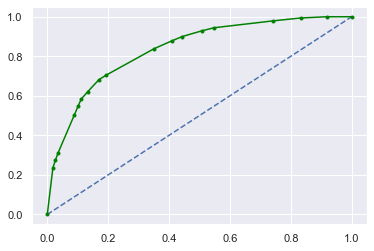

In [125]:
# AUC and ROC for the training data (Development Sample)

# predict probabilities
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

#### Classification report

In [126]:
print(classification_report(test_labels,best_grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.71      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



#### Confusion Matrix

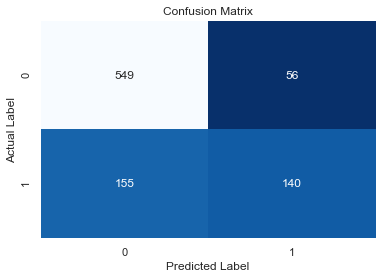

In [127]:
# Get the confusion matrix on the train data
confusion_matrix(test_labels,best_grid_dt.predict(X_test))
sns.heatmap(confusion_matrix(test_labels,best_grid_dt.predict(X_test)),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#### AUC and ROC Curve for testing data

AUC: 0.802


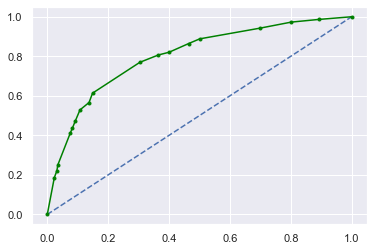

In [128]:
# AUC and ROC for the test data (Holdout sample)

# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

## Model 2 - Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rfcl = RandomForestClassifier(n_estimators = 300, random_state=1)
rfcl = rfcl.fit(X_train, train_labels)

### Model Performance of Train data

#### Train Accuracy

In [131]:
rfcl.score(X_train,train_labels)

0.9947619047619047

In [132]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

#### Confusion Matrix

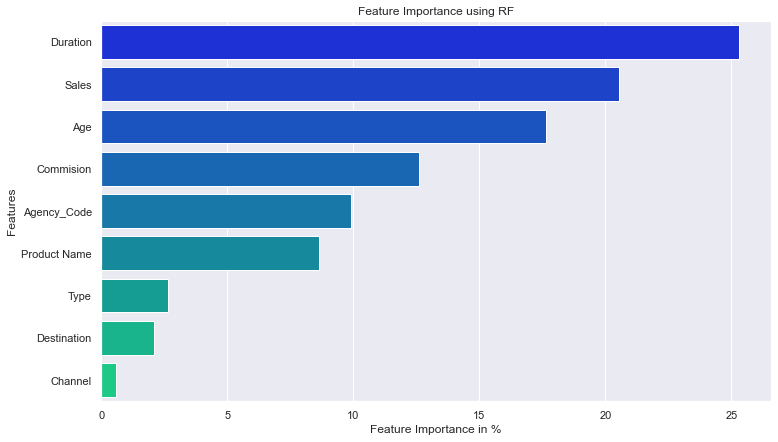

In [133]:
x=pd.DataFrame(rfcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='winter')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

#### Classification report

In [134]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1471
           1       1.00      0.99      0.99       629

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



#### AUC and ROC for the training data

AUC: 1.000


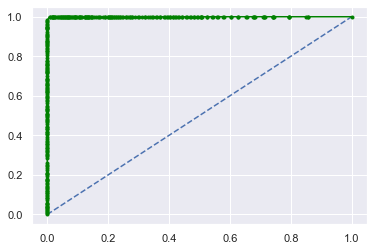

In [135]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

#### Test Accuracy

In [136]:
rfcl.score(X_test,test_labels)

0.7566666666666667

#### Classification report

In [137]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       605
           1       0.69      0.47      0.56       295

    accuracy                           0.76       900
   macro avg       0.73      0.68      0.70       900
weighted avg       0.75      0.76      0.74       900



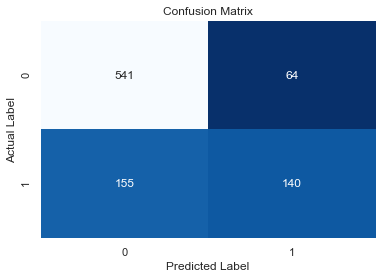

In [138]:
# Get the confusion matrix on the test data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

#### AUC and ROC for the test data

AUC: 0.802


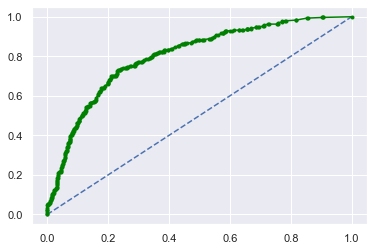

In [139]:
# AUC and ROC for the test data

# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Grid Search is done for finding out the optimal values for the hyper parameters

In [140]:
param_grid = {
    'max_depth': [4,5,6,7,8],
    'max_features': [3,4,5, 6,7],
    'min_samples_leaf': [20,30, 40,50,60],
    'min_samples_split': [60,150, 120,150,180],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [141]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [20, 30, 40, 50, 60],
                         'min_samples_split': [60, 150, 120, 150, 180],
                         'n_estimators': [301, 501]})

In [142]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 501}

In [143]:
best_grid_rf = grid_search.best_estimator_

In [144]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)

#### Feature importance

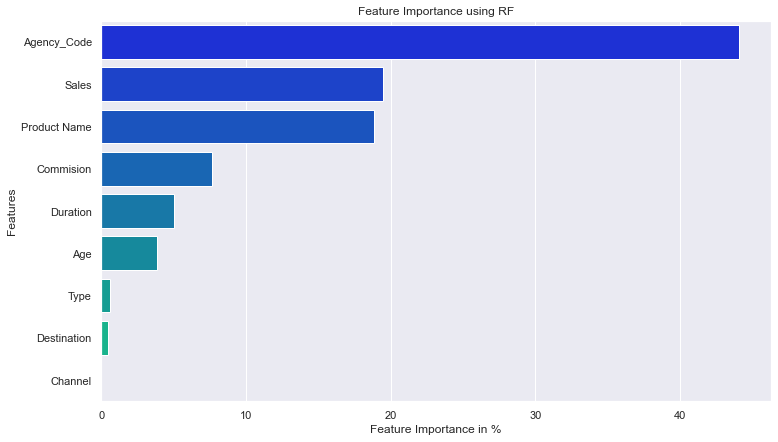

In [145]:
x=pd.DataFrame(best_grid_rf.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='winter')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

### Model Performance of Train data

In [146]:
best_grid_rf.score(X_train,train_labels)

0.8057142857142857

In [147]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.60      0.65       629

    accuracy                           0.81      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



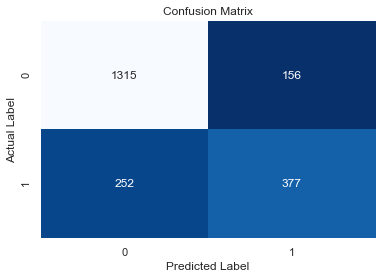

In [148]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.849


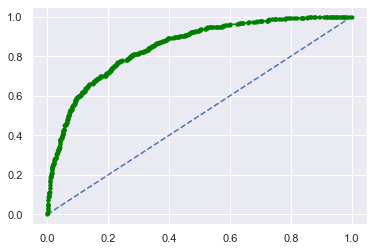

In [149]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

In [150]:
best_grid_rf.score(X_test,test_labels)

0.7677777777777778

In [151]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.48      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



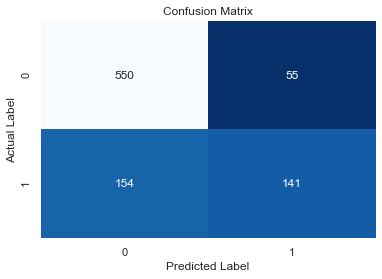

In [152]:
# Get the confusion matrix on the test data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.819


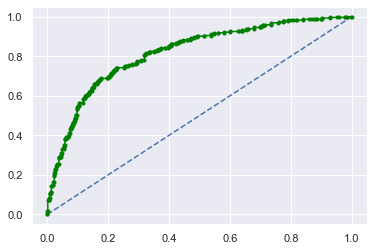

In [153]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

## Model 3 - ANN

In [154]:
from sklearn.neural_network import MLPClassifier

In [155]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.001)

In [156]:
clf.fit(X_train, train_labels)

Iteration 1, loss = 0.73122427
Iteration 2, loss = 0.70476447
Iteration 3, loss = 0.67436926
Iteration 4, loss = 0.64722570
Iteration 5, loss = 0.62401539
Iteration 6, loss = 0.60474880
Iteration 7, loss = 0.58885920
Iteration 8, loss = 0.57578935
Iteration 9, loss = 0.56466886
Iteration 10, loss = 0.55535768
Iteration 11, loss = 0.54748592
Iteration 12, loss = 0.54054985
Iteration 13, loss = 0.53473764
Iteration 14, loss = 0.52971935
Iteration 15, loss = 0.52517309
Iteration 16, loss = 0.52119671
Iteration 17, loss = 0.51764002
Iteration 18, loss = 0.51455527
Iteration 19, loss = 0.51179245
Iteration 20, loss = 0.50922933
Iteration 21, loss = 0.50706619
Iteration 22, loss = 0.50502087
Iteration 23, loss = 0.50320436
Iteration 24, loss = 0.50151302
Iteration 25, loss = 0.49996051
Iteration 26, loss = 0.49863449
Iteration 27, loss = 0.49732865
Iteration 28, loss = 0.49621048
Iteration 29, loss = 0.49505678
Iteration 30, loss = 0.49406615
Iteration 31, loss = 0.49317394
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001, verbose=True)

In [157]:
ypred_train = clf.predict(X_train)
ypred_test = clf.predict(X_test)

### Model Performance of Train data

In [158]:
clf.score(X_train,train_labels)

0.7704761904761904

In [159]:
print(classification_report(train_labels,ypred_train))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1471
           1       0.71      0.39      0.50       629

    accuracy                           0.77      2100
   macro avg       0.75      0.66      0.68      2100
weighted avg       0.76      0.77      0.75      2100



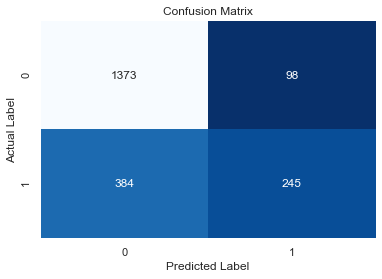

In [160]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ypred_train)
sns.heatmap(confusion_matrix(train_labels,ypred_train),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.803


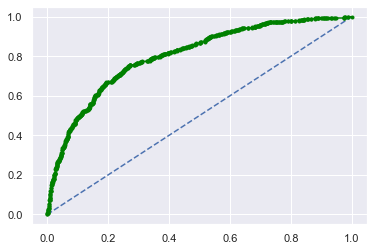

In [161]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

In [162]:
clf.score(X_test,test_labels)

0.7422222222222222

In [163]:
print(classification_report(test_labels,ypred_test))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       605
           1       0.74      0.33      0.46       295

    accuracy                           0.74       900
   macro avg       0.74      0.64      0.64       900
weighted avg       0.74      0.74      0.71       900



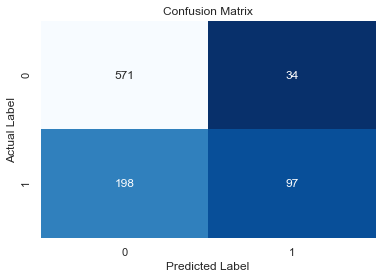

In [164]:
# Get the confusion matrix on the test data
confusion_matrix(test_labels,ypred_test)
sns.heatmap(confusion_matrix(test_labels,ypred_test),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.782


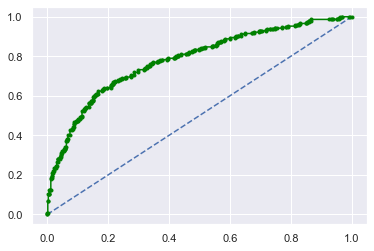

In [165]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Tuning through Grid Search

In [166]:
param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [4000,5000],
    'solver': ['sgd','adam'],
    'activation': ['logistic', 'relu'],
    'tol': [0.01,0.001]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [167]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [4000, 5000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [168]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'max_iter': 4000,
 'solver': 'adam',
 'tol': 0.001}

In [169]:
best_grid_ann = grid_search.best_estimator_

In [170]:
ytrain_predict = best_grid_ann.predict(X_train)
ytest_predict = best_grid_ann.predict(X_test)

#### Model Performance of Train data

In [171]:
best_grid_ann.score(X_train,train_labels)

0.7833333333333333

In [172]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1471
           1       0.69      0.50      0.58       629

    accuracy                           0.78      2100
   macro avg       0.75      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



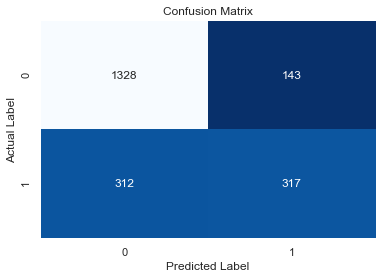

In [173]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.825


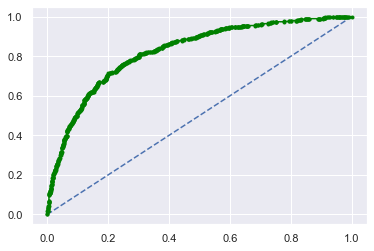

In [174]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

### Model Performance of Test data

In [175]:
best_grid_ann.score(X_test,test_labels)

0.7577777777777778

In [176]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       605
           1       0.73      0.41      0.53       295

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.68       900
weighted avg       0.75      0.76      0.74       900



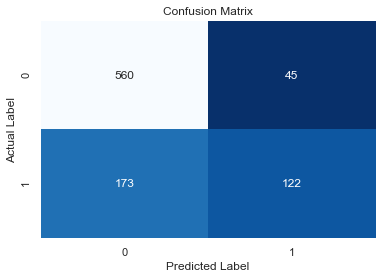

In [177]:
# Get the confusion matrix on the test data
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.809


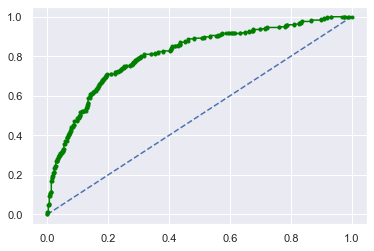

In [178]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',color='green')
# show the plot
plt.show()

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

Area under the curve for Decision Tree Classification Model is 0.8357638239671271
Area under the curve for Random Forest Classification Model is 0.8486569706428146
Area under the curve for Artificial Neural Network Model is 0.8248906522389947


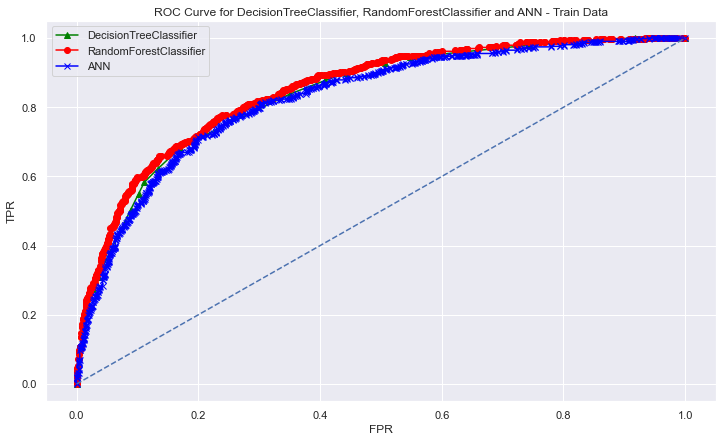

In [183]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(train_labels,best_grid_dt.predict_proba(X_train)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(train_labels,best_grid_rf.predict_proba(X_train)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(train_labels,best_grid_ann.predict_proba(X_train)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(train_labels, best_grid_dt.predict_proba(X_train)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='^',color='green') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(train_labels, best_grid_rf.predict_proba(X_train)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='red') 

fpr_ann, tpr_ann, thresholds = roc_curve(train_labels, best_grid_ann.predict_proba(X_train)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',color='blue') 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {} - Train Data'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for Decision Tree Classification Model is 0.8017481439977587
Area under the curve for Random Forest Classification Model is 0.8185151982070318
Area under the curve for Artificial Neural Network Model is 0.8091469393472475


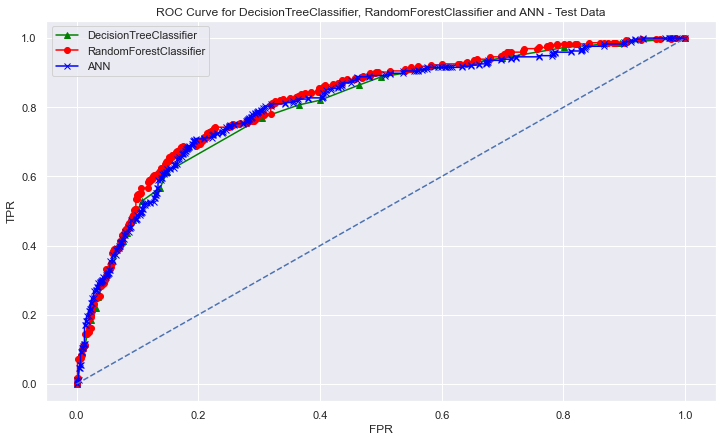

In [190]:
models_names={best_grid_dt:'DecisionTreeClassifier',best_grid_rf:'RandomForestClassifier',best_grid_ann:'ANN'}

print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,best_grid_dt.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,best_grid_rf.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,best_grid_ann.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, best_grid_dt.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='^',color='green') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, best_grid_rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='red') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels, best_grid_ann.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',color='blue') 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {} - Test Data'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

In [188]:
Model_comparison = pd.read_excel("Book1.xlsx")

In [189]:
Model_comparison 

,Model Performance,CART -Train,CART - Test,RF - Train,RF - Test,ANN - Train,ANN - Test
0,Accuracy,0.805,0.770,0.810,0.77,0.780,0.760
1,AUC,0.836,0.802,0.850,0.82,0.825,0.809
2,Precision,0.690,0.710,0.710,0.72,0.690,0.730
3,Recall,0.580,0.470,0.601,0.48,0.501,0.410
4,F1 score,0.630,0.570,0.650,0.57,0.580,0.530


### Inferences of Comparison of Model performance:  
we have built the 3 models namely CART, random forest and artificial neural network. We have checked the performances of all 3 models on training and test data sets.
- In the problem statement, we should understand the meaning of False positives and False Negatives. False positives are those people who actually did not claim for the insurance but the algorithm predicted that they would claim. False Negatives are those people who actually claimed for the insurance but the model predicted that won’t claim.
- As a result, we can see that false positives will not have a significant impact on our firm, however false negatives would. As a result, in this scenario, sensitivity or recall will be more crucial.
- All the 3 models are performing good and there is no under fitting or over fitting for and of the models performed.
- The training and test values aren't that far apart for all three values, thus there seems to be no concern of overfitting or underfitting.
- When comparing the ROC curves of the three models, Random Forest has the best graph of the three and also covers the maximum area.
- Clearly, we can infer from the above table that, the Random Forest model has the highest values for Accuracy, AUC score, Precision, Recall and F1 score when training data is considered.
- Finally, the Random Forest model is the most optimised model, and we would choose that as our final model.


## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

According to the problem statement, the Insurance firm providing tour insurance is facing higher claim frequency. This means that people are filing insurance claims more frequently. The company wants to go into historical data to figure out why the frequency is so high and come up with a strategy to reduce it by using the model performances.

In our extensive analysis so far, we have thoroughly examined historical data and developed a model that predicts claim status based on the characteristics in our dataset. Let us now look at the key points in our past data first and try to find out some recommendations for the firm.

#### Following are the insights and recommendations to help the management solve the business objective:

#### Insights from the Graphs and Analysis from EDA:

- Claimed: Although the number of insurances claimed recorded was less than half that of insurances not claimed, the sales for both claimed and unclaimed insurances were almost equal. As a result, sales of claimed insurances were significantly higher than those of non-claimed insurances.

-	Agency: 
o	JZI agency has the lowest number of records as well as the least sales for both claimed and unclaimed insurances.
o	For C2B agency, claimed insurances are more than the unclaimed ones; both in terms of number and sales. 
o	EPX agency has the highest unclaimed to claimed ratio. The sales are also good and the claimed insurances are very less as well.

- Product:
o	Customised plan and Cancellation plan are the best products when it comes to insurance claims. Their Unclaimed to claimed insurance ratio is very high for these. 
o	Silver plan is having claimed insurance bookings way more. The sales of these bookings which have claimed insurances are too high as well. 
o	Gold plan is the least taken plan.

- Booking Type: 
o	The people who booked airlines had equal number for both who claimed and did not claim for insurance. However, the sales for those who claimed were way higher than who did not claim.
o	It can be said that higher sales value bookings opted for insurance claim more. Travel Agency performed good. Unclaimed to claimed ratio was considerably less both in terms of numbers and sales.

- Channel:
o	Offline bookings are negligible as compared to Online bookings.
o	 Number of Online bookings getting claimed for insurance is lower but sales value is higher.

-	Destination:
o	Bookings for ASIA is the highest. AMERICA and EUROPE have very low bookings as compared to ASIA. In ASIA, number of bookings that got claimed is lower but the sales of bookings which got claimed was higher.


#### Recommendations:

- Records having a greater sales value should be prioritised since they are more likely to be claimed for insurance.
-	JZI agency needs to equip resources to pick up sales as they fall through the cracks, promotional marketing campaign can be launched, or assess whether the insurance firm need to tie up with another alternate agency.
-	The business should promote bookings from Travel Agency
-	As a result, insurance firm requires customers to buy airline tickets, as well as cross-sell insurance based on claim data patterns.
-	Customers benefited from streamlining online experiences, which resulted in a rise in conversions and, as a result, subsequently raises profits. Online reservations with a higher value should be prioritised.
-	The gold plan should be restructured so that more customers choose to use it. The Silver plan should review its procedures and strive to reduce the number of insurance claims.
-	ASIA's high sales bookings should be monitored. To attract more clients, several marketing plans for America and Europe tours should be implemented. Perhaps some reductions or special offers can be made.

#### Key performance indicators of insurance claims: 
-	Increase customer satisfaction which in fact will give more revenue 
-	Combat fraud transactions, deploy measures to avoid fraudulent transactions at earliest 
-	Optimize claims recovery method
-	Reduce claim handling costs


## Thank you